In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# rows of datasets
df_1=pd.read_csv("train.csv")
df_2=pd.read_csv("test.csv")
df_3=pd.read_csv("gender_submission.csv")
print(df_3.shape[0])
print(df_1.shape[0])
print(df_2.shape[0])
df_1

418
891
418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# structure of datasets
print(df_1.describe())
print(df_1.dtypes)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      int64
Survived         int64
Pclass           int64
Name        

In [4]:
# data clenaing
# counting number of null values in each columns of data 1.
print(df_1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# data clenaing
# counting number of null values in each columns of data 2.
print(df_2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# data clenaing
# counting number of null values in each columns of data_3.
print(df_3.isnull().sum())

PassengerId    0
Survived       0
dtype: int64


In [7]:
# finding categotical Data
print("Names of coloumns which have categorical data in data-1-Train - >")
print(df_1.select_dtypes(include=['object']).columns.tolist())


print("Names of coloumns which have categorical data in data-2-Test ->")
print(df_2.select_dtypes(include=['object']).columns.tolist())


print("Names of coloumns which have categorical data in data-3-Gender_submission ->")
print(df_3.select_dtypes(include=['object']).columns.tolist())

Names of coloumns which have categorical data in data-1-Train - >
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Names of coloumns which have categorical data in data-2-Test ->
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Names of coloumns which have categorical data in data-3-Gender_submission ->
[]


In [8]:
# converting categorical data into numeric values
cleanup = {"Sex": {"female": 1, "male": 2}}
df_1.replace(cleanup).dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

plot of male and female passenger and survived passenger ->


Text(0, 0.5, 'Count')

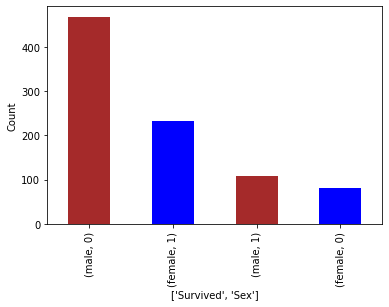

In [9]:
print("plot of male and female passenger and survived passenger ->")
c_0=df_1['Sex'].value_counts()[0]
c_1=df_1[['Sex','Survived']].value_counts()
c_1.plot(kind='bar',color=['brown','blue'])
plt.xlabel(['Survived','Sex'])
plt.ylabel('Count')


# . Show the histogram of the count of passengers who died (according to their age). Age ranges should
be <10, 10 to <20, 20 to <30 and so on. 

In [10]:
df_1.query('Survived ==0 and Age<=16').count()

PassengerId    45
Survived       45
Pclass         45
Name           45
Sex            45
Age            45
SibSp          45
Parch          45
Ticket         45
Fare           45
Cabin           2
Embarked       45
dtype: int64

(array([ 61., 143.,  94.,  55.,  28.,  13.,   6.,   0.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 8 artists>)

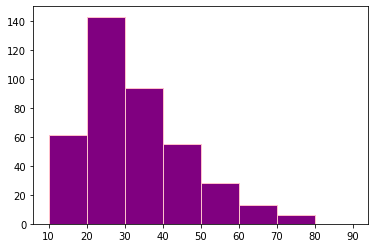

In [11]:
b=df_1.query('Survived==0')
a=b['Age']
plt.hist(a,bins=[10,20,30,40,50,60,70,80,90],edgecolor='pink',color='purple')

# Q-3)_Give the percentage of passengers who survived as had paid more than $100. Justify if there was any
bias in the rescue operation towards the rich (Yes/No/not enough evidence). 

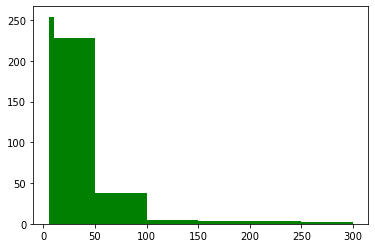

In [12]:
fare=df_1.query('Survived!=1')
fare
#m=fare.groupby(['Fare'])['Survived']
plt.hist(fare['Fare'],bins=[5,10,50,100,150,200,250,300],color='green')
plt.show()


#  Q-3)_b_Give the percentage of passengers who survived as had paid more than $100. Justify if there was any
bias in the rescue operation towards the rich (Yes/No/not enough evidence). 

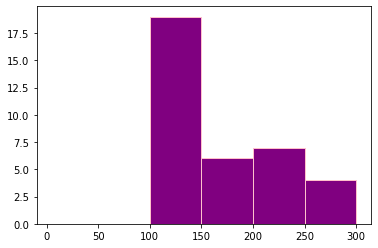

Number of Passenger who survived and have fare>=100 =  39
 Number of PassengerId who have paid fare>=100 =  53
Percentage of passenger survived =  73.58490566037736 %


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df_1=pd.read_csv("train.csv")
fare=df_1.query('Survived==1 and Fare>=100')
#print(df_1)
#m=fare.groupby(['Fare'])['Survived']
plt.hist(fare['Fare'],bins=[5,10,50,100,150,200,250,300],edgecolor='pink',color='Purple')
plt.show()
# perecenatge of passenger who survived and they paid fare>100
total_sur_pess=df_1.query('Fare>=100')
n_f=total_sur_pess['PassengerId'].count()
n_s=fare['PassengerId'].count()
print("Number of Passenger who survived and have fare>=100 = ", n_s)
#n_f=fare['PassengerId'].count()
print(" Number of PassengerId who have paid fare>=100 = ",n_f)
per=(n_s/n_f)*100
print("Percentage of passenger survived = ",per,"%")
df_1


# Q-4)_. Plot graphs showing correlation between different pairs of attributes. Infer if there is any significant
correlation between survivors and any specific feature.

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

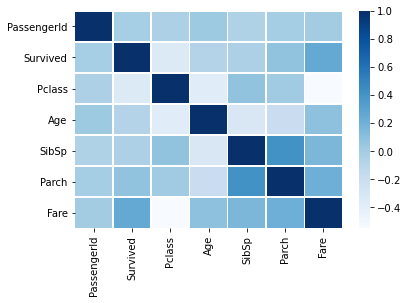

In [14]:
# finding coorelation between columns
cor=df_1.corr()
print(cor)
#plotting the corrraltion matrix 
sns.heatmap(cor,linewidth = 0.5 , cmap = 'Blues')

#  Q-5)_Find the number of passengers who were married.

In [15]:
#finding number of married passengers
n=df_1['Name'].tolist()
c=0
for i in range(len(n)):
    for j in range(i,len(n[i])):
        if('Mrs.' in n[j] ):
            c=c+1
print(c)


128


curve fitting such that some time of error is  minimum. regression
